<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_KNN_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
# Import DataSet
import pandas as pd
from matplotlib import pyplot as plt
# create 2 data frame. 1 for regression and another for classification
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
df_regression = df.copy()
df_classification = df.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [141]:
# before doing regression separate X (gender, height) and Y (weight)
col_x_regr = df_regression[['Gender', 'Height']].copy()
col_x_regr.head()
col_y_regr = df_regression[['Weight']].copy()
col_y_regr.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# label Encoding

In [142]:
# apply label encoding on X
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype

le = LabelEncoder()
all_columns = col_x_regr.columns
for column in all_columns:
  if is_string_dtype(col_x_regr[column]):
    # col_x_regr[column] = le.fit_transform(col_x_regr[column])
    col_x_regr.loc[:, column] = le.fit_transform(col_x_regr[column])

col_x_regr.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Train and Test Dataset for Linear Regression

In [143]:
# create train dataset and test dataset (70% / 30%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(col_x_regr, col_y_regr, test_size=0.30)

# Linear Regression, MSE, MAE

In [144]:
# apply linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(xtrain, ytrain)
# l_reg.predict([[1, 73.847017]])
test_predictions = l_reg.predict(xtest)

In [145]:
# get MSE, MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
l_reg_mse = mean_squared_error(ytest, test_predictions)
l_reg_mse

106.59409947851368

In [146]:
l_reg_mae = mean_absolute_error(ytest, test_predictions)
l_reg_mae

8.11697231570257

# KNN Regression, MSE, MAE

In [149]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

127.17606784811925

In [151]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

8.856203071729645

# Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

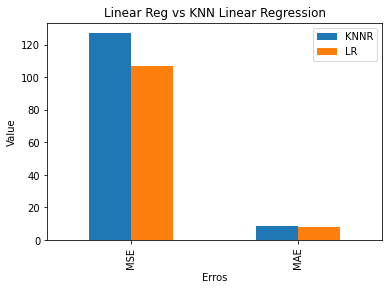

In [155]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR":[kn_reg_mse, kn_reg_mae],
    "LR":[l_reg_mse, l_reg_mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")